<a href="https://colab.research.google.com/github/Shambhogit/DL/blob/main/TransferLearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model(Skin Cancer Classification Using Transfer Learning by VGG16 Architecture)[Reasearch Paper](https://www.scirp.org/journal/paperinformation?paperid=126855)

**Student Name:** Shambho Jaybhaye

**Roll No:** 52

**PRN:**202302040001

**Date of Submission:** 2-3-2025


In [ ]:
!pip install imutils
!pip install efficientnet



In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


import os
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
from glob import glob



In [ ]:
#Configuration environment
import os
os.environ['KAGGLE_USERNAME'] = "shambhojaybhaye" # username from the json file
os.environ['KAGGLE_KEY'] = "c141f0c21726af31232a383845af0757" # key from the json file
#!kaggle datasets download -d sachinkumar413/diabetic-retinopathy-dataset
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

Dataset URL: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
License(s): unknown
skin-cancer-malignant-vs-benign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip

Archive:  skin-cancer-malignant-vs-benign.zip
replace data/test/benign/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_path = '/content/train'
test_path = '/content/test'

# Feature Extraction


Working with 1440 images of benign
Image examples: 
485.jpg 

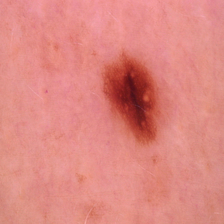

1452.jpg 

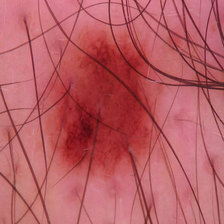

808.jpg 

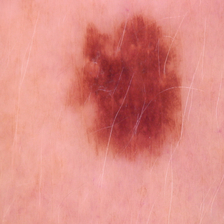

362.jpg 

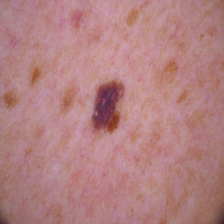

157.jpg 

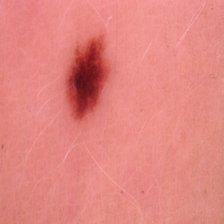

242.jpg 

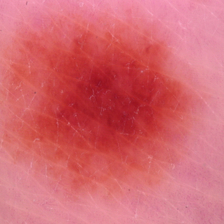

60.jpg 

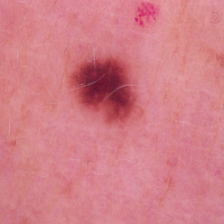

1060.jpg 

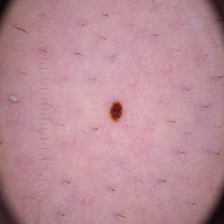

116.jpg 

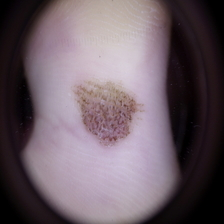

1480.jpg 

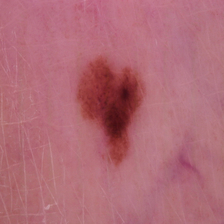

Working with 1440 images of benign
Image examples: 
485.jpg 

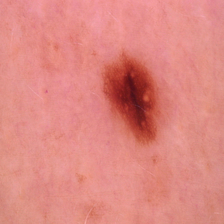

1452.jpg 

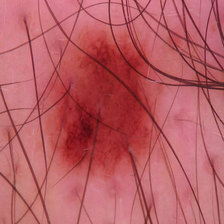

808.jpg 

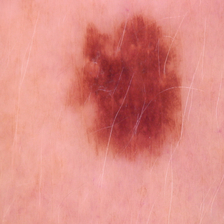

362.jpg 

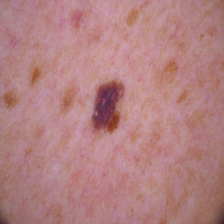

157.jpg 

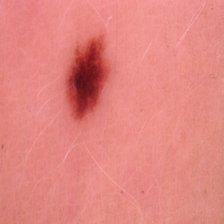

242.jpg 

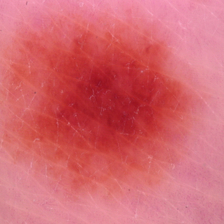

60.jpg 

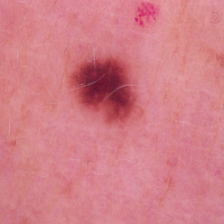

1060.jpg 

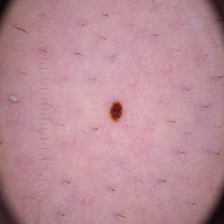

116.jpg 

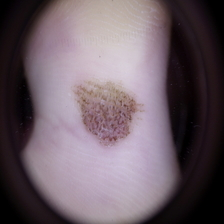

1480.jpg 

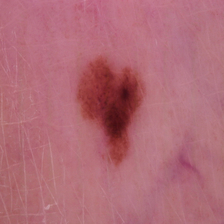

In [ ]:

from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

folder = train_path+'/benign'

onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images of benign".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i], end=" ")
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

folder = train_path+'/benign'

onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images of benign".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i] , end=" ")
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
IMAGE_SIZE = [100, 100];
vgg16 = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [ ]:

for layer in vgg16.layers:
  layer.trainable = False
  print(layer.name)

vgg16.trainable=False


input_layer_9
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
folders = glob(train_path+'/*')
print(len(folders))


2


In [ ]:
# Flatten the output
x = Flatten()(vgg16.output)

# Define the output layer
prediction = Dense(len(folders), activation='softmax')(x)

# Define the model correctly
model = Model(inputs=vgg16.input, outputs=prediction)

# Print the model summary
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │           9,218 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,723,906 (56.17 MB)

 Trainable params: 9,218 (36.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:

from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint to save the best model
checkpoint = ModelCheckpoint(filepath='mymodel.keras', verbose=2, save_best_only=True)


# List of callbacks
callbacks = [checkpoint]

# Record the start time
start = datetime.now()

# Train the model
model_history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(train_set),   # Ensure correct step calculation
    validation_steps=len(test_set),   # Ensure correct step calculation
    callbacks=callbacks,
    verbose=2
)

# Calculate training duration
duration = datetime.now() - start
print("Training completed in time:", duration)


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.08264, saving model to mymodel.keras
83/83 - 341s - 4s/step - accuracy: 0.7710 - loss: 1.6035 - val_accuracy: 0.8273 - val_loss: 1.0826
Epoch 2/10

Epoch 2: val_loss did not improve from 1.08264
83/83 - 383s - 5s/step - accuracy: 0.8153 - loss: 0.9960 - val_accuracy: 0.8273 - val_loss: 1.0918
Epoch 3/10

Epoch 3: val_loss did not improve from 1.08264
83/83 - 352s - 4s/step - accuracy: 0.8282 - loss: 0.9328 - val_accuracy: 0.7773 - val_loss: 1.3123
Epoch 4/10

Epoch 4: val_loss did not improve from 1.08264
83/83 - 370s - 4s/step - accuracy: 0.8403 - loss: 0.8285 - val_accuracy: 0.8015 - val_loss: 1.1273
Epoch 5/10

Epoch 5: val_loss improved from 1.08264 to 0.91581, saving model to mymodel.keras
83/83 - 352s - 4s/step - accuracy: 0.8350 - loss: 0.8865 - val_accuracy: 0.8121 - val_loss: 0.9158
Epoch 6/10

Epoch 6: val_loss did not improve from 0.91581
83/83 - 367s - 4s/step - accuracy: 0.8422 - loss: 0.7725 - val_accuracy: 0.8364 - val

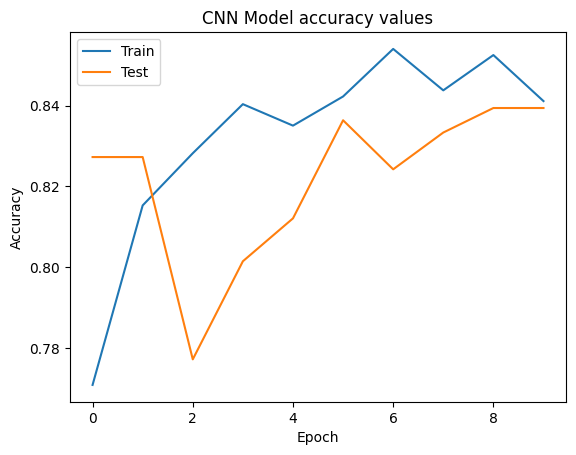

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step

Classification Report:
               precision    recall  f1-score   support

      benign       0.55      0.53      0.54       360
   malignant       0.46      0.48      0.47       300

    accuracy                           0.51       660
   macro avg       0.50      0.50      0.50       660
weighted avg       0.51      0.51      0.51       660



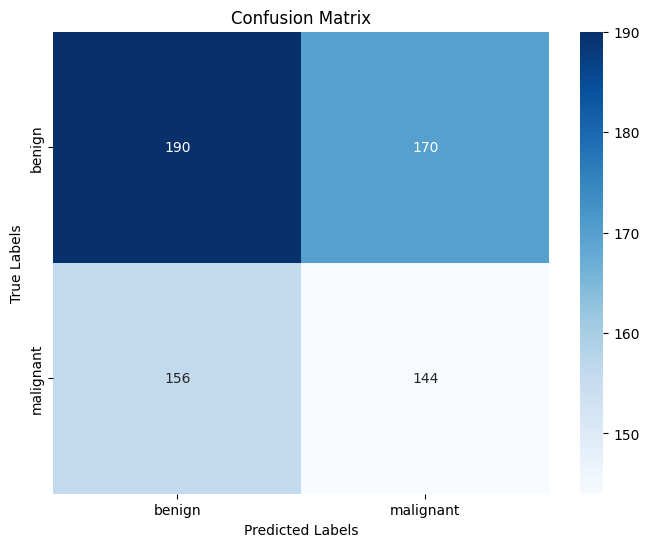

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get True Labels
y_true = test_set.classes  # Actual class labels

# Get Predictions
y_pred_probs = model.predict(test_set)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Class Labels
class_labels = list(test_set.class_indices.keys())

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## **Fine Tuning**

In [ ]:
# Freeze all layers first
for layer in vgg16.layers:
    layer.trainable = False

# Unfreeze the last 3 convolutional layers
for layer in vgg16.layers:
    if layer.name in ['block5_conv3']:
        layer.trainable = True  # Enable training for these layers

# Print trainable layers
for layer in vgg16.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")

Layer: input_layer_9, Trainable: False
Layer: block1_conv1, Trainable: False
Layer: block1_conv2, Trainable: False
Layer: block1_pool, Trainable: False
Layer: block2_conv1, Trainable: False
Layer: block2_conv2, Trainable: False
Layer: block2_pool, Trainable: False
Layer: block3_conv1, Trainable: False
Layer: block3_conv2, Trainable: False
Layer: block3_conv3, Trainable: False
Layer: block3_pool, Trainable: False
Layer: block4_conv1, Trainable: False
Layer: block4_conv2, Trainable: False
Layer: block4_conv3, Trainable: False
Layer: block4_pool, Trainable: False
Layer: block5_conv1, Trainable: False
Layer: block5_conv2, Trainable: False
Layer: block5_conv3, Trainable: True
Layer: block5_pool, Trainable: False


In [ ]:
# Flatten the output
x = Flatten()(vgg16.output)

# Define the output layer
prediction = Dense(len(folders), activation='softmax')(x)

# Define the model correctly
model = Model(inputs=vgg16.input, outputs=prediction)

# Print the model summary
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │           9,218 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,723,906 (56.17 MB)

 Trainable params: 2,369,026 (9.04 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Recompile the model after changing trainable layers
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7272 - loss: 1.5987
Epoch 1: val_loss improved from inf to 0.94178, saving model to finetuning.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 351s 4s/step - accuracy: 0.7277 - loss: 1.5952 - val_accuracy: 0.8167 - val_loss: 0.9418
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8060 - loss: 0.8043
Epoch 2: val_loss improved from 0.94178 to 0.73698, saving model to finetuning.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - accuracy: 0.8060 - loss: 0.8038 - val_accuracy: 0.8288 - val_loss: 0.7370
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8524 - loss: 0.6246
Epoch 3: val_loss did not improve from 0.73698
83/83 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.8523 - loss: 0.6245 - val_accuracy: 0.8152 - val_loss: 0.7732
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8450 - loss: 0.5343
Epoch 4: val_loss improved from 0.73698 to 0.57132, saving model to finetuning.keras
83/83 ━━━━━━━━━━━━━━━━

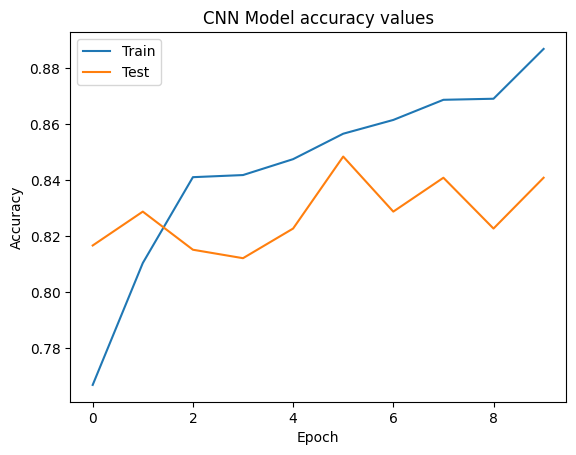

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step

Classification Report:
               precision    recall  f1-score   support

      benign       0.56      0.56      0.56       360
   malignant       0.48      0.48      0.48       300

    accuracy                           0.52       660
   macro avg       0.52      0.52      0.52       660
weighted avg       0.52      0.52      0.52       660



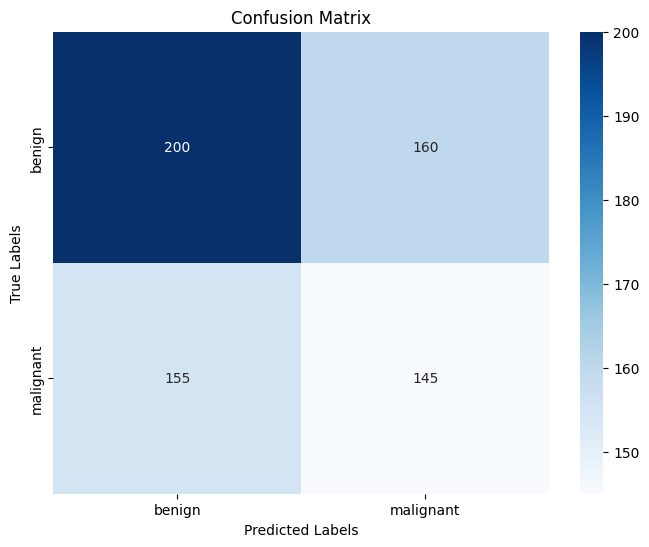

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get True Labels
y_true = test_set.classes  # Actual class labels

# Get Predictions
y_pred_probs = model.predict(test_set)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Class Labels
class_labels = list(test_set.class_indices.keys())

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()